# Microsoft GraphRAG:
- Works using Python 3.10
- GraphRah Version = 2.3.0

## Overview


GraphRAG is a structured, hierarchical approach to Retrieval Augmented Generation (RAG), as opposed to naive semantic-search approaches using plain text snippets. The GraphRAG process involves extracting a knowledge graph out of raw text, building a community hierarchy, generating summaries for these communities, and then leveraging these structures when perform RAG-based tasks.

To learn more about GraphRAG and how it can be used to enhance your language model's ability to reason about your private data, please visit the Microsoft Research Blog Post.

## Query Engine


The Query Engine is the retrieval module of the Graph RAG Library. It is one of the two main components of the Graph RAG library, the other being the Indexing Pipeline (see Indexing Pipeline). It is responsible for the following tasks:

Local Search
Global Search
DRIFT Search
Question Generation

## Local Search

Local search method generates answers by combining relevant data from the AI-extracted knowledge-graph with text chunks of the raw documents. This method is suitable for questions that require an understanding of specific entities mentioned in the documents (e.g. What are the healing properties of chamomile?).

## Global Search

Global search method generates answers by searching over all AI-generated community reports in a map-reduce fashion. This is a resource-intensive method, but often gives good responses for questions that require an understanding of the dataset as a whole (e.g. What are the most significant values of the herbs mentioned in this notebook?).


## Drift Search
DRIFT Search introduces a new approach to local search queries by including community information in the search process. This greatly expands the breadth of the query’s starting point and leads to retrieval and usage of a far higher variety of facts in the final answer. This addition expands the GraphRAG query engine by providing a more comprehensive option for local search, which uses community insights to refine a query into detailed follow-up questions.

## Basic Search
GraphRAG includes a rudimentary implementation of basic vector RAG to make it easy to compare different search results based on the type of question you are asking. You can specify the top k txt unit chunks to include in the summarization context.

## Question Generation
This functionality takes a list of user queries and generates the next candidate questions. This is useful for generating follow-up questions in a conversation or for generating a list of questions for the investigator to dive deeper into the dataset.

## Conclusion

Microsoft GraphRAG represents a significant step forward in retrieval-augmented generation, particularly for tasks requiring a global understanding of datasets. By incorporating knowledge graphs, it offers improved performance, making it ideal for complex information retrieval and analysis.

For those experienced with basic RAG systems, GraphRAG offers an opportunity to explore more sophisticated solutions, although it may not be necessary for all use cases.
Retrieval Augmented Generation (RAG) is often performed by chunking long texts, creating a text embedding for each chunk, and retrieving chunks for including in the LLM generation context based on a similarity search against the query. This approach works well in many scenarios, and at compelling speed and cost trade-offs, but doesn't always cope well in scenarios where a detailed understanding of the text is required.

GraphRag ( [microsoft.github.io/graphrag](https://microsoft.github.io/graphrag/) )

## Install GraphRAG


In [ ]:
%pip install -r requirements.txt

## Running the Indexer

We need to set up a data project and some initial configuration. First let's get a sample dataset ready:

In [ ]:
import os

os.makedirs('./ragtest/input', exist_ok=True)

Get a copy of Microsoft information from the web:

In [ ]:
# !curl https://www.gutenberg.org/cache/epub/24022/pg24022.txt > ./ragtest/input/book.txt

import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Microsoft"  # Replace with the URL of the web page you want to scrape
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


os.makedirs('./ragtest/input', exist_ok=True)

if not os.path.exists('./ragtest/input/microsoft.txt'):
    microsoft = soup.text.split('\nSee also')[0]
    with open('./ragtest/input/microsoft.txt', 'w', encoding='utf-8') as f:
        f.write(microsoft)
else:
    with open('./ragtest/input/microsoft.txt', 'r') as f:
        elon = f.read()


## Set Up Your Workspace Variables

To initialize your workspace, first run the graphrag init command. Since we have already configured a directory named ./ragtest in the previous step, run the following command:

In [74]:
# !python -m graphrag.index --init --root ./ragtest 
!graphrag init --root ./ragtest

⠋ GraphRAG Indexer 
Initializing project at C:\Users\ccoello\Documents\GraphRag\ragtest
⠋ GraphRAG Indexer 


┌───────────────────── Traceback (most recent call last) ─────────────────────┐
│ c:\Users\ccoello\Documents\postgres-sa-byoac\.conda\lib\site-packages\graph │
│ rag\cli\main.py:117 in _initialize_cli                                      │
│                                                                             │
│   114 │   """Generate a default configuration file."""                      │
│   115 │   from graphrag.cli.initialize import initialize_project_at         │
│   116 │                                                                     │
│ > 117 │   initialize_project_at(path=root, force=force)                     │
│   118                                                                       │
│   119                                                                       │
│   120 @app.command("index")                                                 │
│                                                                             │
│ ┌────────────────────────────── locals

## Running the Indexing pipeline

Finally we'll run the pipeline!

In [75]:
# !python -m graphrag.index --root ./ragtest 
!graphrag index --root ./ragtest
# !python -m graphrag index --root ./ragtest


⠋ GraphRAG Indexer 
Logging enabled at 
C:\Users\ccoello\Documents\GraphRag\ragtest\logs\indexing-engine.log
⠋ GraphRAG Indexer 
⠹ GraphRAG Indexer 
🚀 LLM Config Params Validated
⠼ GraphRAG Indexer 
🚀 Embedding LLM Config Params Validated
⠇ GraphRAG Indexer 
⠇ GraphRAG Indexer 
Running standard indexing.
⠇ GraphRAG Indexer 
└── Loading Input (text) - 1 files loaded (0 filtered) ----- 100% 0:00:… 0:00:…
⠏ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (0 filtered) ----- 100% 0:00:… 0:00:…
⠏ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (0 filtered) ----- 100% 0:00:… 0:00:…
🚀 create_base_text_units
⠏ GraphRAG Indexer 
├── Loading Input (text) - 1 files loaded (0 filtered) ----- 100% 0:00:… 0:00:…
├── create_base_text_units ------------------------------- 100% 0:00:00 0:00:00
                                                  id  ... n_tokens
0  e534d302a641f3110464617e36b519833e3fea736e2b84...  ...      418

[1 rows x 4 columns]
⠏ GraphRAG Indexer 
├── Loading 

## Using the Query Engine
Now let's ask some questions using this dataset.

## Global Search
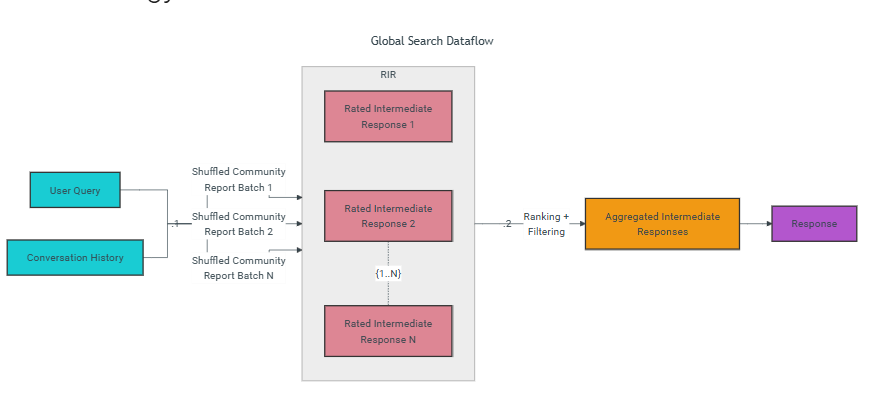

Here is an example using Global search to ask a high-level question:

In [76]:
!graphrag query --root ./ragtest --method global --query "What are the top components about this company?"




SUCCESS: Global Search Response:
### Overview of Microsoft's Top Components

Microsoft is a globally influential technology company with a diverse portfolio of products and services that span personal computing, cloud computing, and gaming. Its operations are centralized at its headquarters in Redmond, Washington, which serves as the hub for innovation and global activities. Below are the key components that define Microsoft's ecosystem and its impact on the industry.

---

### 1. **Windows: A Cornerstone of Computing**
Windows is one of Microsoft's flagship products and a foundational element of its success. First launched in 1985, Windows has evolved into a widely used series of operating systems, with the latest version, Windows 11, introduced in 2021. Windows 11 features a redesigned interface and enhanced productivity tools, making it a critical platform for both personal and enterprise computing. Its widespread adoption underscores Microsoft's influence in shaping the computin

## Local Search
The local search method combines structured data from the knowledge graph with unstructured data from the input documents to augment the LLM context with relevant entity information at query time. It is well-suited for answering questions that require an understanding of specific entities mentioned in the input documents (e.g., “What are the healing properties of chamomile?”).

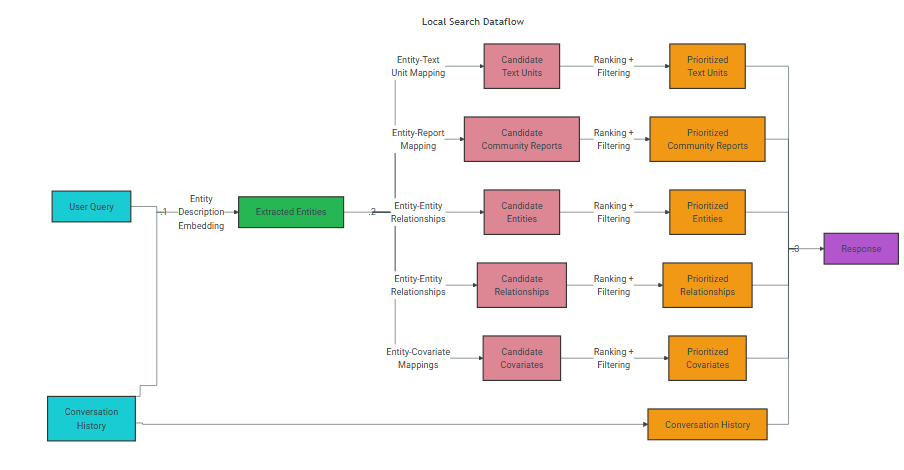

Here is an example using Local search to ask a more specific question about a particular person:


In [77]:
!graphrag query --root ./ragtest --method local --query "Who is Paul Allen?"




INFO: Vector Store Args: {
    "default_vector_store": {
        "type": "lancedb",
        "db_uri": "C:\\Users\\ccoello\\Documents\\GraphRag\\ragtest\\output\\lancedb",
        "url": null,
        "audience": null,
        "container_name": "==== REDACTED ====",
        "database_name": null,
        "overwrite": true
    }
}

SUCCESS: Local Search Response:
### Paul Allen: Co-Founder of Microsoft

Paul Allen was a pivotal figure in the technology industry, best known as the co-founder of Microsoft alongside Bill Gates. His contributions were instrumental in the early development and success of the company, which has grown into one of the most influential technology enterprises globally. Allen's partnership with Gates laid the foundation for Microsoft's innovative trajectory, particularly during its formative years [Data: Entities (2); Relationships (1)].

### Contributions to Microsoft

Allen's role in Microsoft's creation and early growth cannot be overstated. He worked closely

## Drift Search

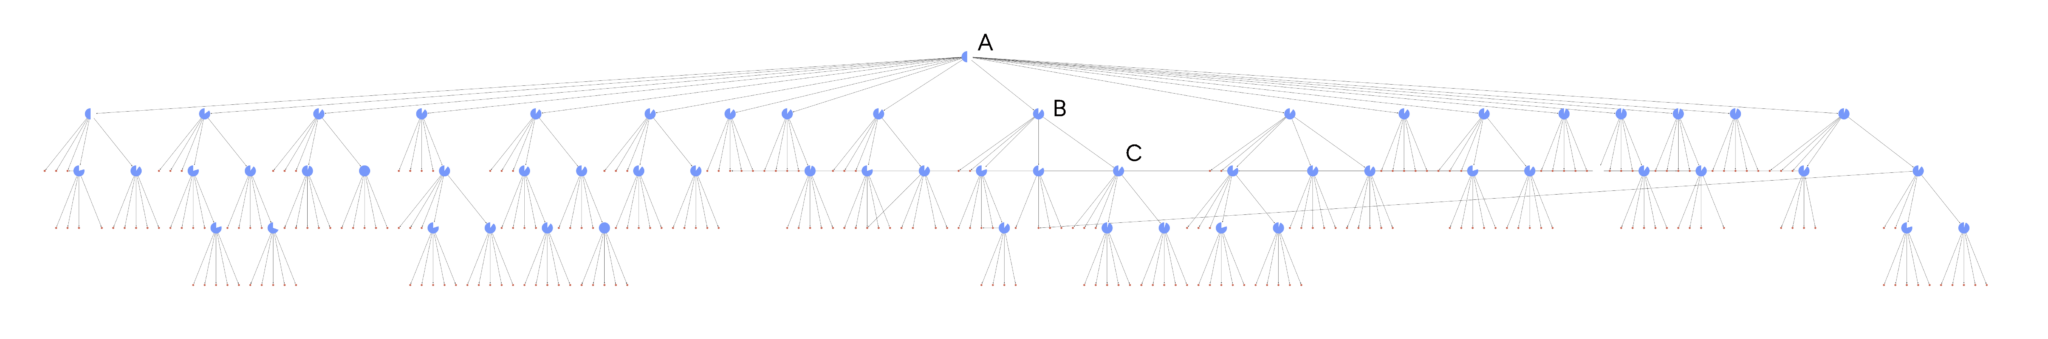

*Figure 1. An entire DRIFT search hierarchy highlighting the three core phases of the DRIFT search process. A (Primer): DRIFT compares the user’s query with the top K most semantically relevant community reports, generating a broad initial answer and follow-up questions to steer further exploration. B (Follow-Up): DRIFT uses local search to refine queries, producing additional intermediate answers and follow-up questions that enhance specificity, guiding the engine towards context-rich information. A glyph on each node in the diagram shows the confidence the algorithm has to continue the query expansion step. C (Output Hierarchy): The final output is a hierarchical structure of questions and answers ranked by relevance, reflecting a balanced mix of global insights and local refinements, making the results adaptable and comprehensive.*

DRIFT Search introduces a new approach to local search queries by including community information in the search process. This greatly expands the breadth of the query’s starting point and leads to retrieval and usage of a far higher variety of facts in the final answer. This addition expands the GraphRAG query engine by providing a more comprehensive option for local search, which uses community insights to refine a query into detailed follow-up questions.

In [78]:
!graphrag query --root ./ragtest --method drift --query "What were some of the most important products released by Microsoft in the 1990s?"

^C


## Basic Search

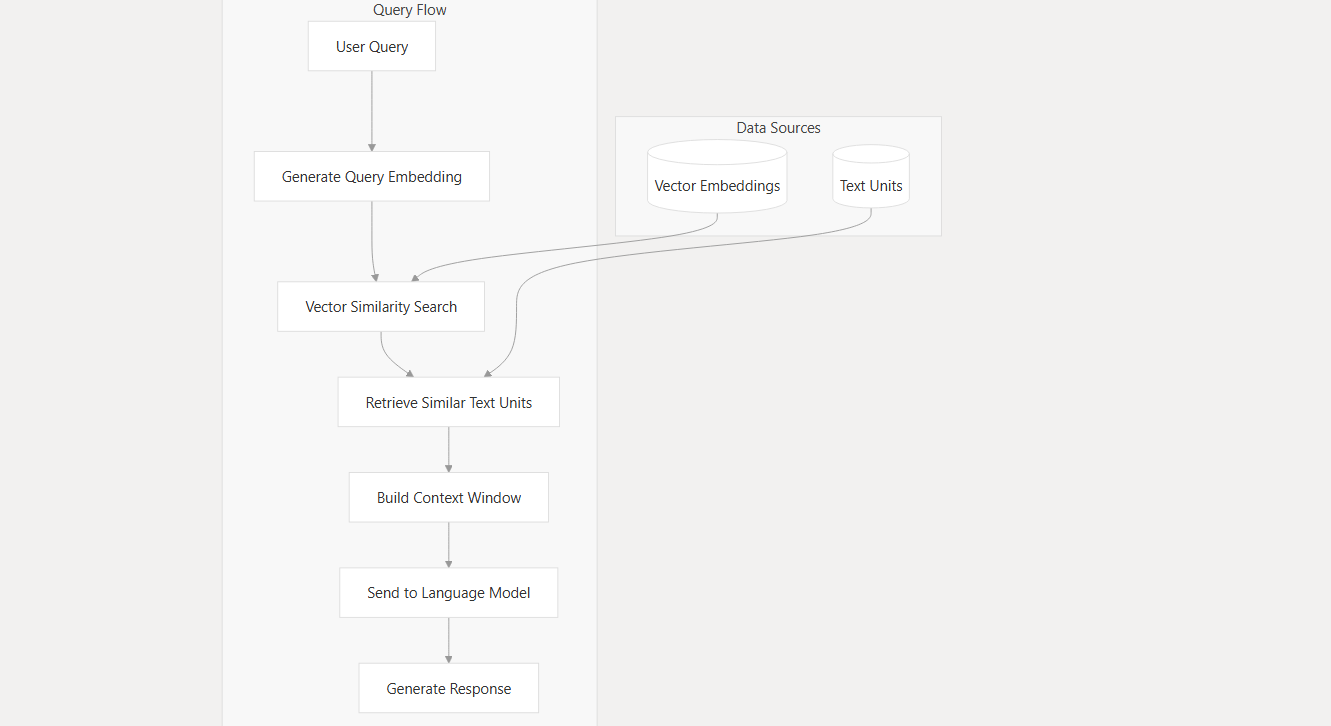

Basic Search works by embedding the user's query and finding the most semantically similar text units in the vector store. These relevant text chunks are then assembled into a context window and passed to a language model to generate a response. This approach is useful for simple factual questions where complex knowledge graph traversal isn't necessary.

In [79]:
!graphrag query --root ./ragtest --method basic --query "What were some of the most important products released by Microsoft in the 1990s?"




INFO: Vector Store Args: {
    "default_vector_store": {
        "type": "lancedb",
        "db_uri": "C:\\Users\\ccoello\\Documents\\GraphRag\\ragtest\\output\\lancedb",
        "url": null,
        "audience": null,
        "container_name": "==== REDACTED ====",
        "database_name": null,
        "overwrite": true
    }
}

SUCCESS: Basic Search Response:
The data provided does not contain specific information about Microsoft's product releases in the 1990s. Therefore, I cannot provide an answer based on the available data. If you have additional details or sources, feel free to share them, and I can assist further!
